# **Visualizacion de datos con Python** : Matplotlib, Seaborn y Plotly


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('inmigrantes_canada.csv')

In [3]:
df.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**Verificar si existen datos nulos que deban ser tratados**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

**Convertir la columna *Pais* en el index del DataFrame para una busqueda mas eficiente**

In [5]:
df.set_index('Pais', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afganistán to Zimbabue
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Continente  195 non-null    object
 1   Region      195 non-null    object
 2   1980        195 non-null    int64 
 3   1981        195 non-null    int64 
 4   1982        195 non-null    int64 
 5   1983        195 non-null    int64 
 6   1984        195 non-null    int64 
 7   1985        195 non-null    int64 
 8   1986        195 non-null    int64 
 9   1987        195 non-null    int64 
 10  1988        195 non-null    int64 
 11  1989        195 non-null    int64 
 12  1990        195 non-null    int64 
 13  1991        195 non-null    int64 
 14  1992        195 non-null    int64 
 15  1993        195 non-null    int64 
 16  1994        195 non-null    int64 
 17  1995        195 non-null    int64 
 18  1996        195 non-null    int64 
 19  1997        195 non-null    int64 
 20  1

**Crear una lista de los años que estan en el DataFrame**

In [7]:
anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

**Se crea una *Serie* con los datos que estan en la fila de *Colombia* y la lista creada anteriormente**

---

La lista sirve para indicarle a Pandas que seleccione **solo las columnas** cuyos nombres coinciden con los elementos de las lista

In [8]:
colombia = df.loc['Colombia' ,anos]
colombia

,Colombia
1980,266
1981,326
1982,360
1983,244
1984,235
1985,214
1986,257
1987,376
1988,352
1989,439


**Se crea un diccionario para posteriormente utilizarlo para crear un DataFrame**

In [9]:
col_dict = {'Año':colombia.index.to_list(),
            'Inmigrantes':colombia.values.tolist()}

In [10]:
datos_col = pd.DataFrame(col_dict)
datos_col.tail()

,Año,Inmigrantes
29,2009,4652
30,2010,5218
31,2011,4366
32,2012,3741
33,2013,3631


## **Haciendo graficos utilizando Matplotlib**

In [11]:
import matplotlib.pyplot as plt

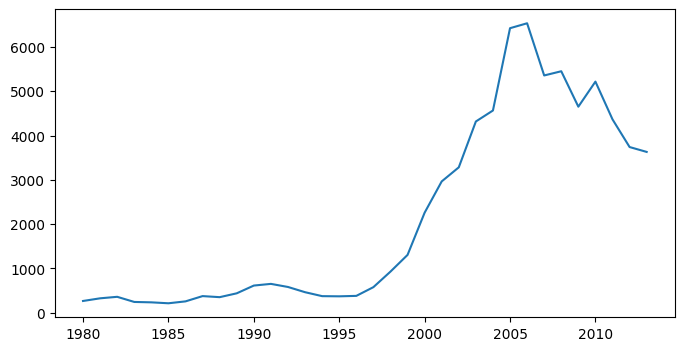

In [12]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

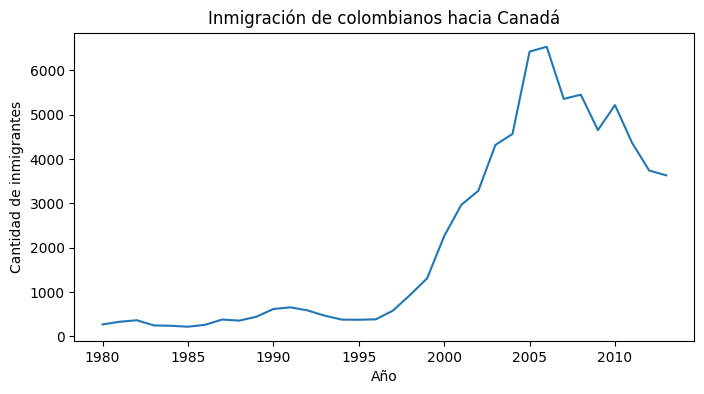

In [13]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.title('Inmigración de colombianos hacia Canadá')
plt.xlabel('Año')
plt.ylabel('Cantidad de inmigrantes')
plt.show()

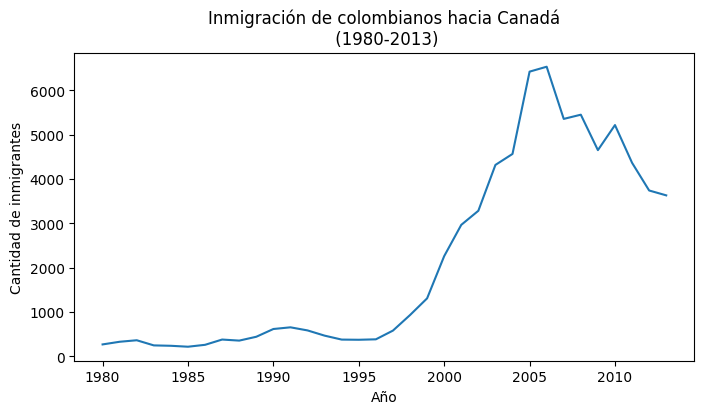

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigración de colombianos hacia Canadá\n (1980-2013)')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de inmigrantes')
plt.show()

### **Boxplot**

---

Un boxplot (o diagrama de caja y bigotes) es una representación gráfica que muestra la distribución de un conjunto de datos numéricos, destacando la mediana, los cuartiles y los valores atípicos

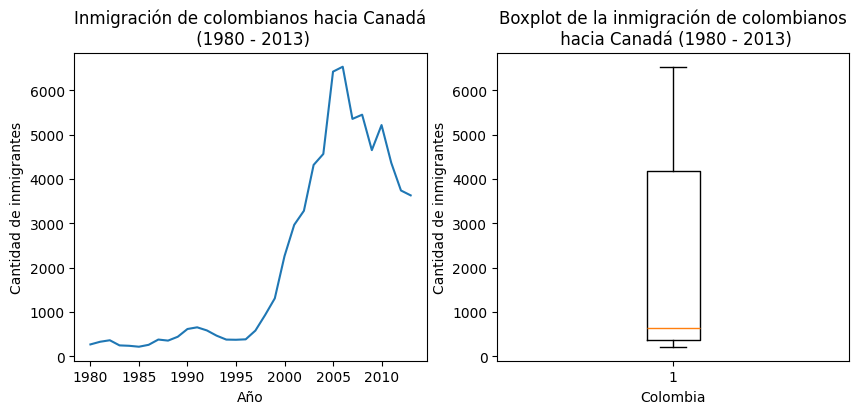

In [15]:
# Con la funcion subplots() se pueden crear 2 o mas graficos
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(datos_col['Año'], datos_col['Inmigrantes'])
ax[0].set_title('Inmigración de colombianos hacia Canadá\n (1980 - 2013)')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Cantidad de inmigrantes')
ax[0].xaxis.set_major_locator(plt.MultipleLocator(5))

ax[1].boxplot(datos_col['Inmigrantes'])
ax[1].set_title('Boxplot de la inmigración de colombianos\n hacia Canadá (1980 - 2013)')
ax[1].set_xlabel('Colombia')
ax[1].set_ylabel('Cantidad de inmigrantes')

plt.show()

In [16]:
datos_col.describe()

,Inmigrantes
count,34.000000
mean,2120.235294
std,2163.761316
min,214.000000
25%,372.000000
50%,633.000000
75%,4173.750000
max,6535.000000


### **Subplots**

---

En Matplotlib, la función subplots() simplifica la creación de múltiples gráficos dentro de una sola figura para la visualización organizada de varios conjuntos de datos.

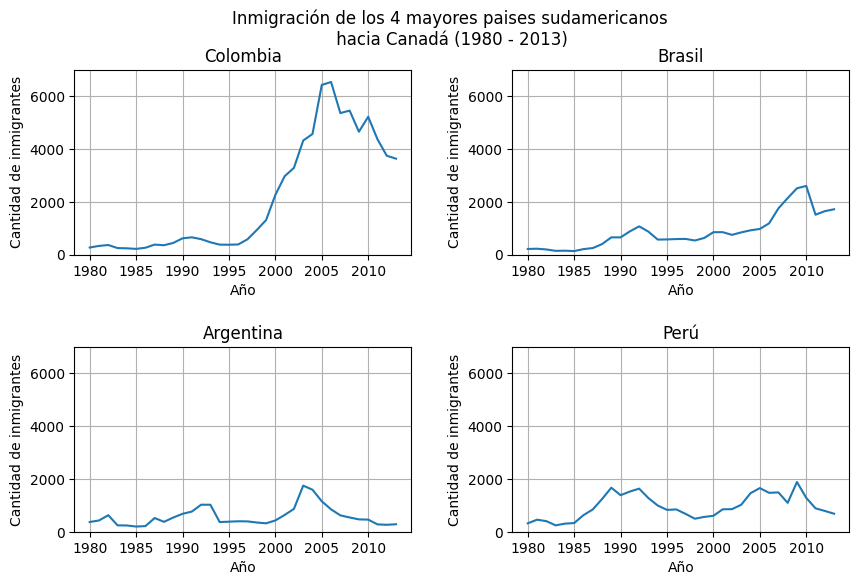

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Espaciado entre las graficas
fig.suptitle('Inmigración de los 4 mayores paises sudamericanos\n hacia Canadá (1980 - 2013)') # Titulo principal

axs[0,0].plot(df.loc['Colombia', '1980':'2013']) # Esta es otra forma de graficar los años utilizando las columnas del dataframe original
axs[0,0].set_title('Colombia')

axs[0,1].plot(df.loc['Brasil', anos])
axs[0,1].set_title('Brasil')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Perú', anos])
axs[1,1].set_title('Perú')

# Establecer un valor maximo y minimo en el eje "y" para un mejor entendimeinto de los datos entre las 4 graficas
ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

# Iteracion en el eje "x" de las 4 graficas para una mejor visualizacion de los datos
for ax in axs.flat:
  ax.set_xlabel('Año')
  ax.set_ylabel('Cantidad de inmigrantes')
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.grid()

plt.show()

### **Personalizando visualizaciones con matplotlib**

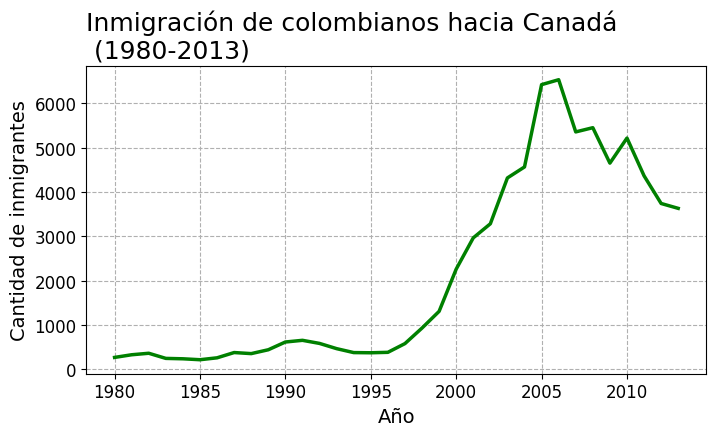

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'], lw=2.5, color='g') #marker='o')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigración de colombianos hacia Canadá\n (1980-2013)', fontsize=18, loc='left')
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

In [19]:
sudamerica = df.query('Region == "América del Sur"')
sudamerica.head(10)

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,América Latina y el Caribe,América del Sur,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guyana,América Latina y el Caribe,América del Sur,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,América Latina y el Caribe,América del Sur,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


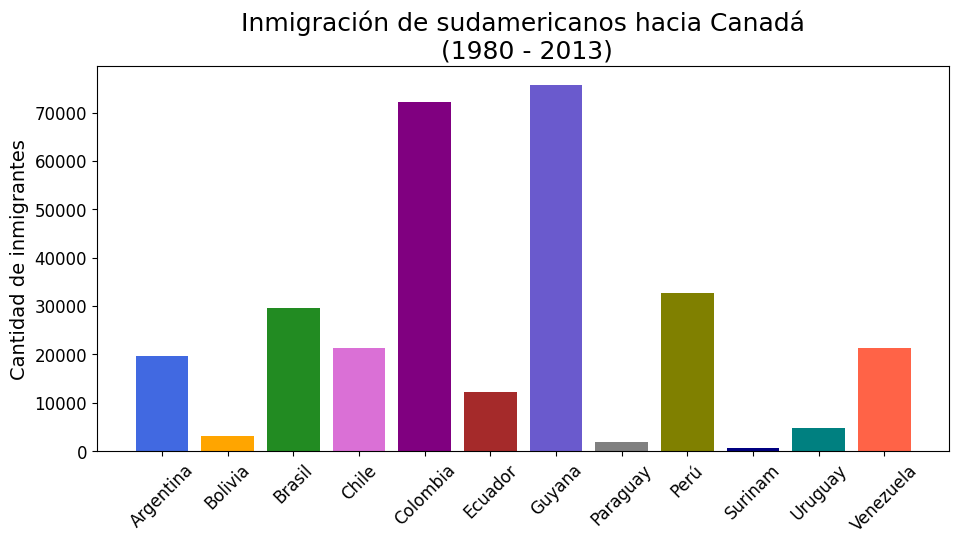

In [20]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive',
           'navy', 'teal', 'tomato']

fig, axs = plt.subplots(figsize=(11,5))
axs.bar(sudamerica.index, sudamerica['Total'], color=colores)
axs.set_title('Inmigración de sudamericanos hacia Canadá\n (1980 - 2013)', fontsize=18)
axs.set_xlabel('')
axs.set_ylabel('Cantidad de inmigrantes', fontsize=14)
axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

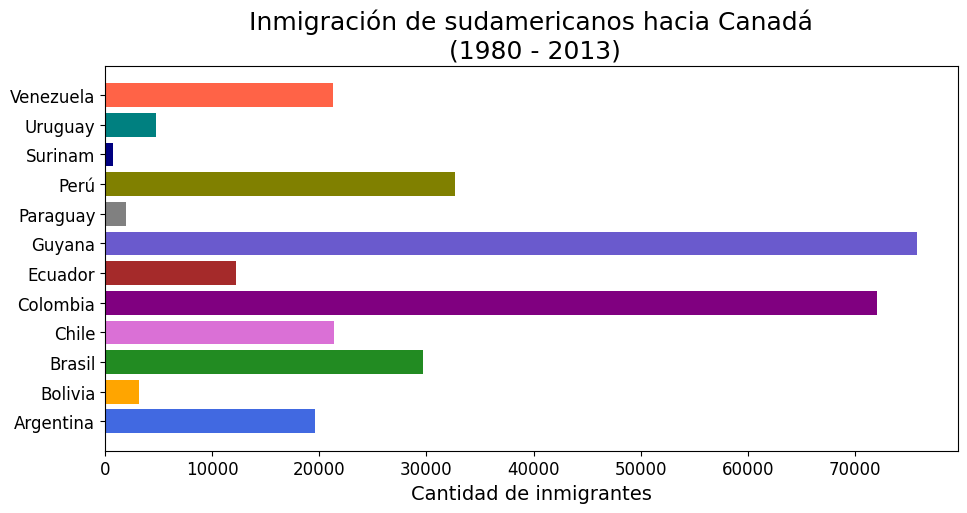

In [21]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive',
           'navy', 'teal', 'tomato']

fig, axs = plt.subplots(figsize=(11,5))
axs.barh(sudamerica.index, sudamerica['Total'], color=colores)
axs.set_title('Inmigración de sudamericanos hacia Canadá\n (1980 - 2013)', fontsize=18)
axs.set_ylabel('')
axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)
plt.show()

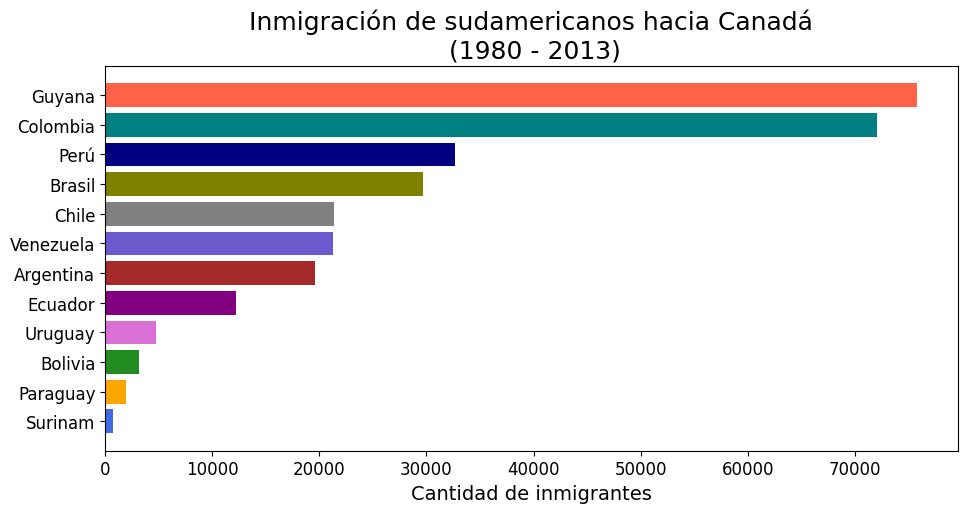

In [22]:
sudamerica_sorted = sudamerica.sort_values('Total', ascending=True)

colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive',
           'navy', 'teal', 'tomato']

fig, axs = plt.subplots(figsize=(11,5))
axs.barh(sudamerica_sorted.index, sudamerica_sorted['Total'], color=colores)
axs.set_title('Inmigración de sudamericanos hacia Canadá\n (1980 - 2013)', fontsize=18)
axs.set_ylabel('')
axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)
plt.show()

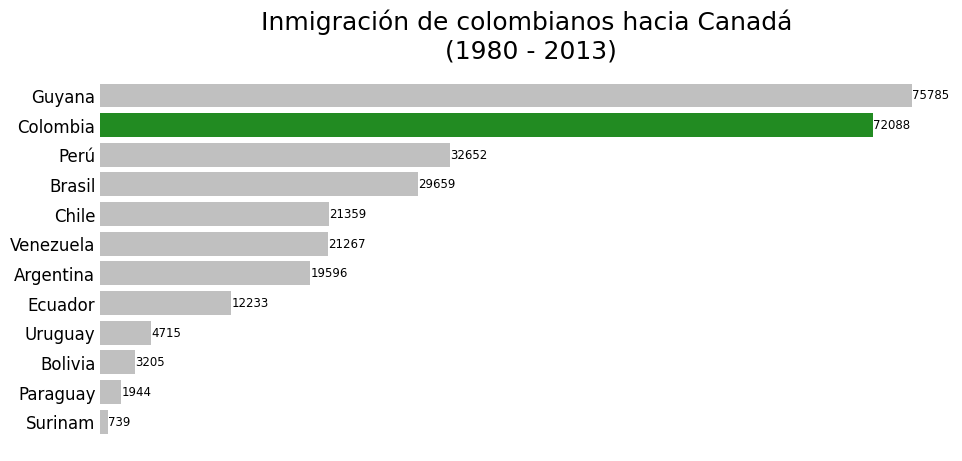

In [23]:
colores = []

for pais in sudamerica_sorted.index:
  if pais == 'Colombia':
    colores.append('forestgreen')
  else:
    colores.append('silver')

fig, axs = plt.subplots(figsize=(11,5))
axs.set_frame_on(False)
axs.xaxis.set_visible(False)
axs.tick_params(axis='y', which='major', length=0)
axs.barh(sudamerica_sorted.index, sudamerica_sorted['Total'], color=colores)
axs.set_title('Inmigración de colombianos hacia Canadá\n (1980 - 2013)', fontsize=18)
axs.set_ylabel('')
# axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
# axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)

'''
La variable i es el indice de cada elemeno de la columna Total (eje y)
La variable j es el valor de cada elemento de la columna Total (eje x)

j + 20 define la posicion horizontal (eje x) de la etiqueta para el numero de
inmigrantes en cada pais
'''
for i,j in enumerate(sudamerica_sorted['Total']):
  axs.text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')

plt.show()

### **Exportando graficos**

Formatos en los que se pueden exportar los graficos

In [24]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


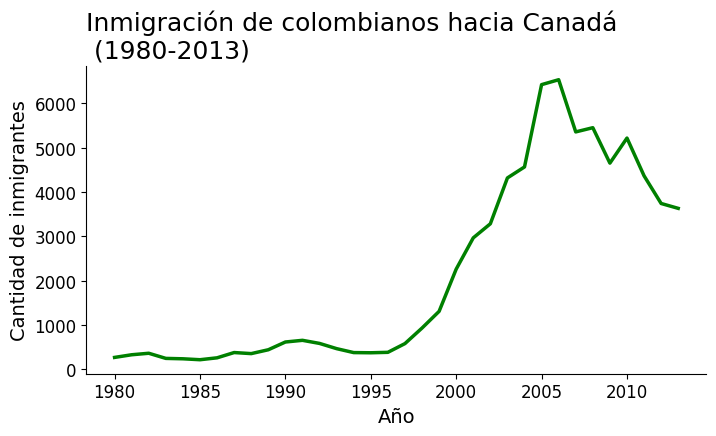

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(datos_col['Año'], datos_col['Inmigrantes'], lw=2.5, color='g') #marker='o')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigración de colombianos hacia Canadá\n (1980-2013)', fontsize=18, loc='left')
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('/content/inmigrantes_colombianos_canada.png', transparent=True, dpi=300, bbox_inches='tight')

plt.show()

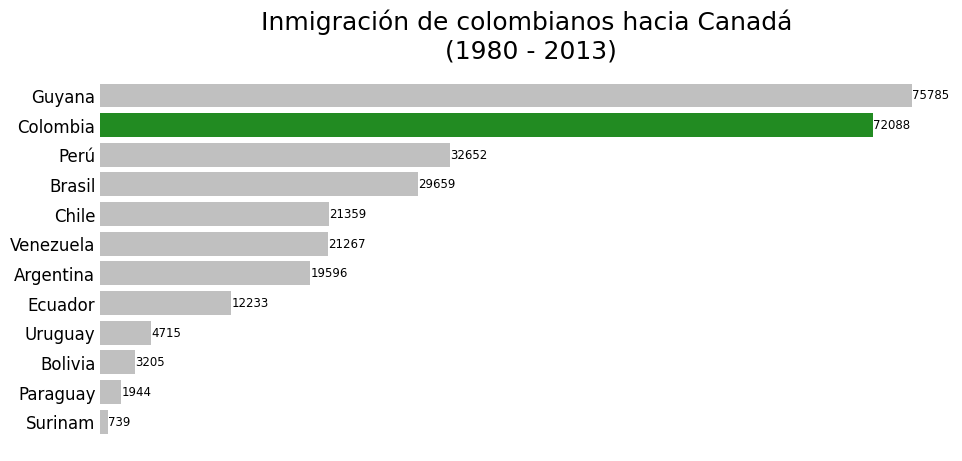

In [26]:
colores = []

for pais in sudamerica_sorted.index:
  if pais == 'Colombia':
    colores.append('forestgreen')
  else:
    colores.append('silver')

fig, axs = plt.subplots(figsize=(11,5))
axs.set_frame_on(False)
axs.xaxis.set_visible(False)
axs.tick_params(axis='y', which='major', length=0)
axs.barh(sudamerica_sorted.index, sudamerica_sorted['Total'], color=colores)
axs.set_title('Inmigración de colombianos hacia Canadá\n (1980 - 2013)', fontsize=18)
axs.set_ylabel('')
# axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
# axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)

'''
La variable i es el indice de cada elemeno de la columna Total (eje y)
La variable j es el valor de cada elemento de la columna Total (eje x)

j + 20 define la posicion horizontal (eje x) de la etiqueta para el numero de
inmigrantes en cada pais
'''
for i,j in enumerate(sudamerica_sorted['Total']):
  axs.text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')

fig.savefig('/content/inmigrantes_sudamericamos_canada.png', transparent=True, dpi=300, bbox_inches='tight')

plt.show()

## **Haciendo graficos utilizando Seaborn**

In [27]:
import seaborn as sns

In [28]:
sns.set_theme()

In [29]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Sur de Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Asia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido,Europa,Norte de Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Asia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistán,Asia,Sur de Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos,América del Norte,América del Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irán,Asia,Sur de Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Sur de Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Corea del Sur,Asia,Asia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


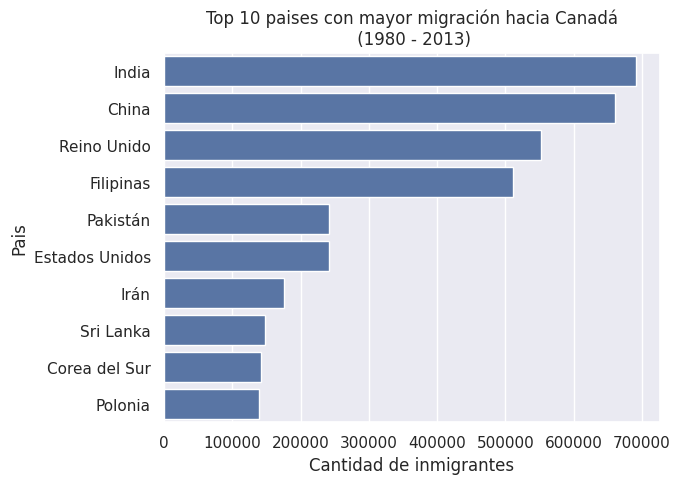

In [30]:
ax = sns.barplot(data=top_10, x='Total', y=top_10.index, orient='h')
ax.set(title='Top 10 paises con mayor migración hacia Canadá\n (1980 - 2013)',
        xlabel='Cantidad de inmigrantes',
        ylabel='Pais')
plt.show()

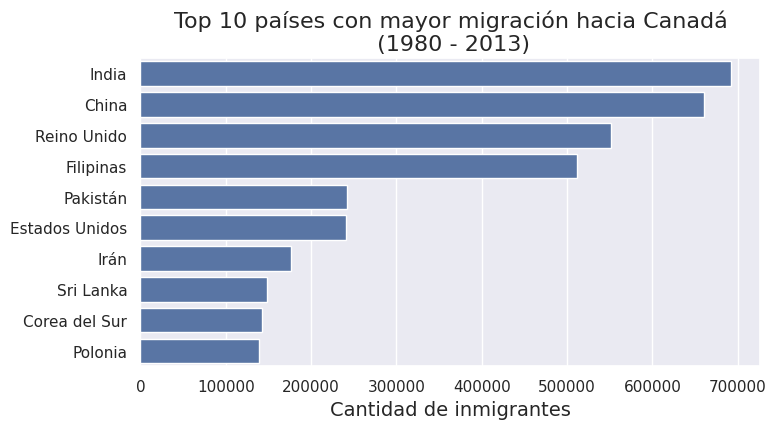

In [31]:
fig, axs = plt.subplots(figsize=(8,4))
sns.barplot(data=top_10, x='Total', y=top_10.index, orient='h')
axs.set_title('Top 10 países con mayor migración hacia Canadá\n (1980 - 2013)', fontsize=16)
axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
axs.set_ylabel('')
plt.show()

In [32]:
def generar_grafico(palette):
  fig, axs = plt.subplots(figsize=(8,4))
  axs.set_frame_on(False)
  axs.xaxis.set_visible(False)
  axs.tick_params(axis='y', which='major', length=0)
  axs = sns.barplot(data=top_10, x='Total', y= top_10.index, hue=top_10.index, orient='h', palette=palette, legend=False)
  axs.set_title('Top 10 países con mayor migración hacia Canadá\n (1980 - 2013)', fontsize=16)
  axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
  axs.set_ylabel('')
  for i,j in enumerate(top_10['Total']):
    axs.text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')
  plt.show()

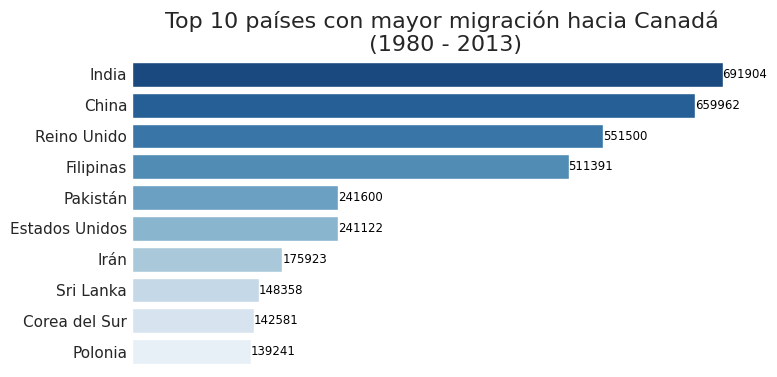

In [33]:
generar_grafico('Blues_r')

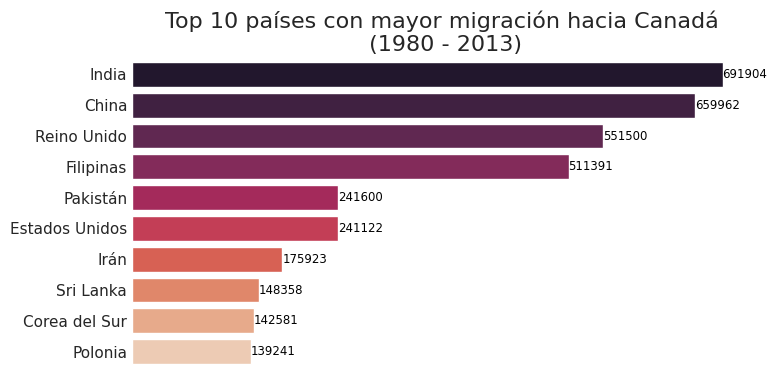

In [34]:
generar_grafico('rocket')

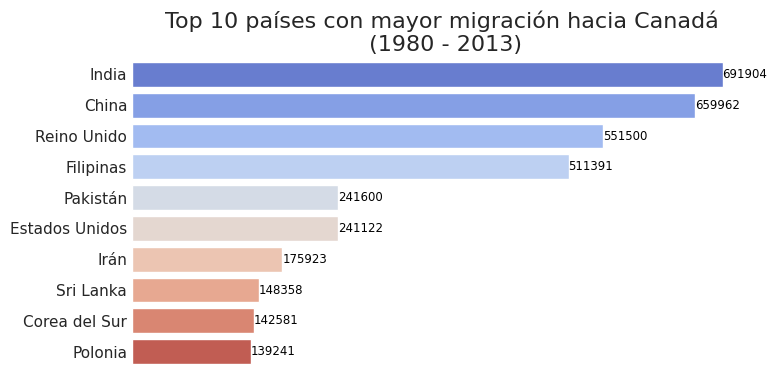

In [35]:
generar_grafico('coolwarm')

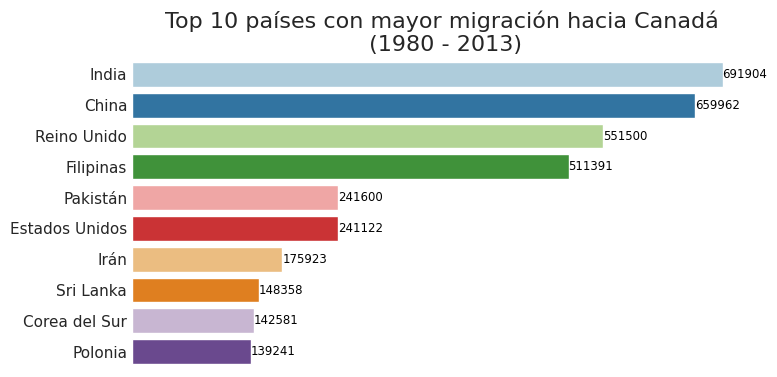

In [36]:
generar_grafico('Paired')

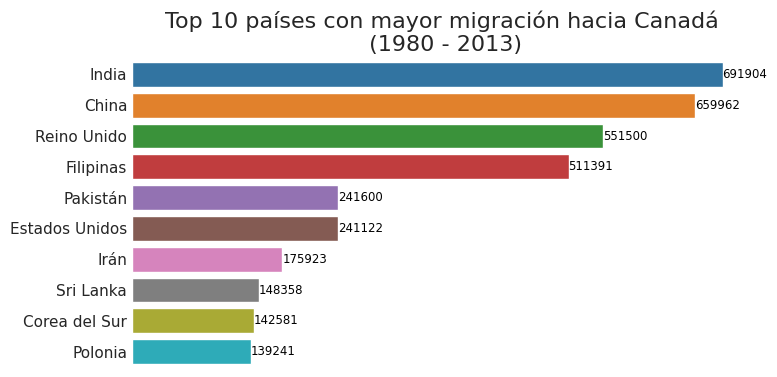

In [37]:
generar_grafico('tab10')

In [38]:
def generar_grafico(palette):
  fig, axs = plt.subplots(figsize=(8,4))
  axs.set(xticklabels=[])
  axs = sns.barplot(data=top_10, x='Total', y= top_10.index, hue=top_10.index, orient='h', palette=palette, legend=False)
  axs.set_title('Top 10 países con mayor migración hacia Canadá\n (1980 - 2013)', fontsize=16)
  axs.set_xlabel('Cantidad de inmigrantes', fontsize=14)
  axs.set_ylabel('')
  sns.despine()
  for i,j in enumerate(top_10['Total']):
    axs.text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')
  plt.show()

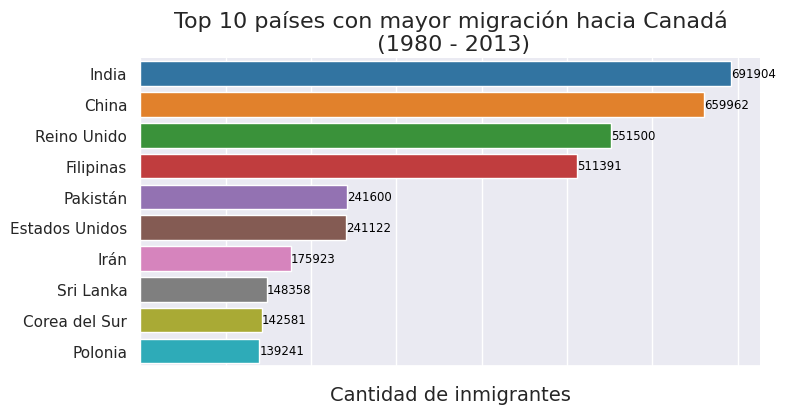

In [39]:
sns.set_theme()
generar_grafico('tab10')

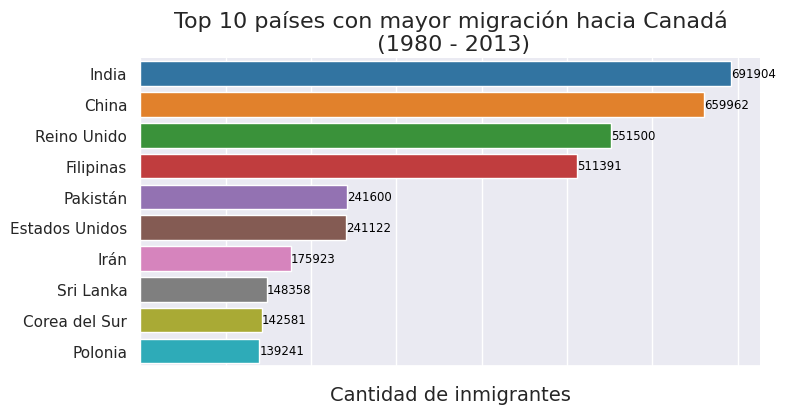

In [40]:
sns.set_theme(style='darkgrid')
generar_grafico('tab10')

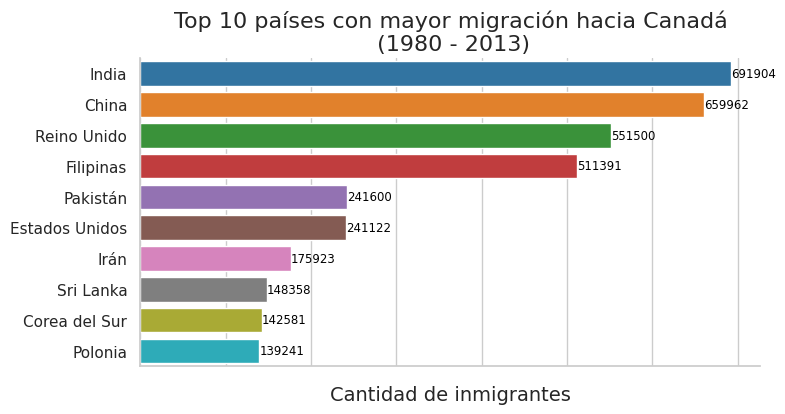

In [41]:
sns.set_theme(style='whitegrid')
generar_grafico('tab10')

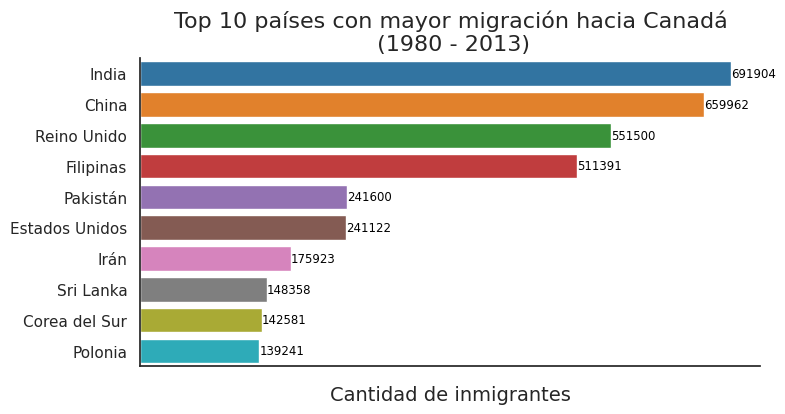

In [42]:
sns.set_theme(style='white')
generar_grafico('tab10')

## **Haciendo graficos utilizando Plotly**

In [43]:
import plotly.express as px

In [44]:
fig = px.line(datos_col, x='Año', y='Inmigrantes', title='Inmigración de colombianos hacia Canadá\n (1980 - 2013)')
fig.update_traces(line_color='green', line_width=3)
fig.update_layout(width=800, height=400, xaxis={'tickangle':-45}, xaxis_title='Año', yaxis_title='Cantidad de inmigrantes',
                  font_family='Arial', font_size=14, font_color='gray')
fig.show()

In [45]:
sudamerica.drop(['Continente', 'Region', 'Total'], axis=1, inplace=True)
sudamerica

/tmp/ipython-input-45-2688336614.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Bolivia,44,52,42,49,38,44,79,165,63,68,...,85,134,139,107,143,214,180,86,83,107
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Chile,1233,1069,1078,781,681,533,633,1454,990,1023,...,383,384,427,530,350,375,340,174,291,273
Colombia,266,326,360,244,235,214,257,376,352,439,...,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631
Ecuador,238,207,184,155,179,208,240,344,265,278,...,417,491,525,419,437,373,353,348,282,418
Guyana,2334,2943,3575,2650,1932,2299,3942,6174,2977,3270,...,1341,1215,1286,1277,1137,1180,953,804,676,656
Paraguay,45,26,32,40,48,36,34,72,53,48,...,74,75,88,98,95,88,89,83,55,66
Perú,317,456,401,241,306,328,628,843,1237,1667,...,1460,1653,1473,1490,1094,1884,1283,886,787,682


In [46]:
sudamerica = sudamerica.T
sudamerica

Pais,Argentina,Bolivia,Brasil,Chile,Colombia,Ecuador,Guyana,Paraguay,Perú,Surinam,Uruguay,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142
1985,196,44,130,533,214,208,2299,36,328,16,92,165
1986,213,79,205,633,257,240,3942,34,628,7,137,179
1987,519,165,244,1454,376,344,6174,72,843,46,269,229
1988,374,63,394,990,352,265,2977,53,1237,16,99,279
1989,538,68,650,1023,439,278,3270,48,1667,24,144,304


In [47]:
fig = px.line(sudamerica, x=sudamerica.index, y=sudamerica.columns,
              title='Inmigración de sudamericanos hacia Canadá\n (1980 - 2013)',
              color='Pais', markers=True)
fig.update_layout(width=900, height=500, xaxis={'tickangle':-45}, xaxis_title='Año',
                  yaxis_title='Cantidad de inmigrantes',font_family='Arial',
                  font_size=14, font_color='gray')
fig.show()

In [48]:
datos_col['Año'] = datos_col['Año'].astype(int)

import plotly.graph_objs as go

# Creando la figura
fig = go.Figure()

# Agregar la línea del gráfico y configurar el grosor de la línea
fig.add_trace(
    go.Scatter(x=[datos_col['Año'].iloc[0]], y=[datos_col['Inmigrantes'].iloc[0]], mode='lines', name='Inmigrantes', line=dict(width=4))
)

# Definir la configuración del layout
fig.update_layout(
    title=dict(
        text='<b>Inmigración de Colombianos hacia Canadá en el periodo de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Año</b>'),
    yaxis=dict(range=[0, 7000], autorange=False, title='<b>Número de Inmigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000,
    height=600
)

# Definir la configuración de la animación
frames = [go.Frame(data=[go.Scatter(x=datos_col['Año'].iloc[:i+1], y=datos_col['Inmigrantes'].iloc[:i+1])]) for i in range(len(datos_col))]
fig.frames = frames

# Mostrar la figura
fig.show()

### **Exportando graficos a HTML**

In [49]:
fig = px.line(sudamerica, x=sudamerica.index, y=sudamerica.columns,
              title='Inmigración de sudamericanos hacia Canadá\n (1980 - 2013)',
              color='Pais', markers=True)
fig.update_layout(width=900, height=500, xaxis={'tickangle':-45}, xaxis_title='Año',
                  yaxis_title='Cantidad de inmigrantes',font_family='Arial',
                  font_size=14, font_color='gray')
fig.write_html('/content/inmigracion_sudamericanos_canada.html')
fig.show()

## **DESAFÍOS**

### **Desafios de Matplotlib**

#### **Desafio 1**

---

Crear un gráfico de líneas comparando los números de inmigrantes de Brasil y Argentina a Canadá, los dos países más grandes de Sudamérica.

In [50]:
paises = df.loc[['Brasil', 'Argentina'], anos].T # Se transpuso el dataframe original para tener los años como indices
paises.head()

Pais,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


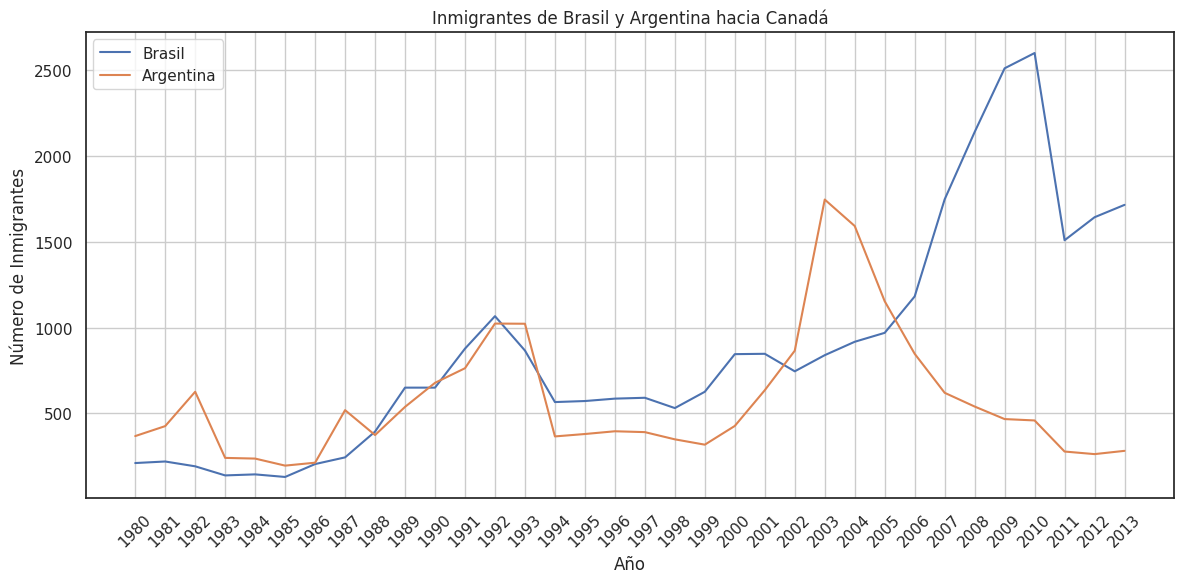

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(paises['Brasil'], label='Brasil')
plt.plot(paises['Argentina'], label='Argentina')
plt.xticks(rotation=45) # Rotar etiquetas para que no se encimen
plt.title('Inmigrantes de Brasil y Argentina hacia Canadá')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.legend()
plt.grid(True)
plt.tight_layout() # Acomoda automáticamente para que no se corten textos
plt.show()

#### **Desafio 2**

---

Trabajas como Analista de Datos en una empresa minorista y te asignaron la tarea de crear una figura con subgráficos que muestre la variación en el número de ventas en cuatro tiendas diferentes a lo largo de un año. La gerencia de la empresa necesita visualizar claramente las tendencias de ventas en cada tienda, para que puedan tomar decisiones estratégicas sobre inventarios y acciones de marketing. Para ello, debes crear cuatro subgráficos dispuestos en dos filas y dos columnas, donde cada subgráfico represente una tienda diferente. En este desafío, cada subgráfico debe presentar un gráfico de líneas que muestre la variación del número de ventas a lo largo de los meses del año.

In [52]:
tiendas = ['A', 'B', 'C', 'D']
ventas_2022 = {'Ene': [100, 80, 150, 50],
    'Feb': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'May': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Sep': [240, 160, 290, 130],
    'Oct': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dec': [300, 350, 400, 250]}

In [53]:
df_tiendas = pd.DataFrame(ventas_2022, index=tiendas)
df_tiendas.index.name = 'Tienda'
df_tiendas

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dec
Tienda,,,,,,,,,,,,
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


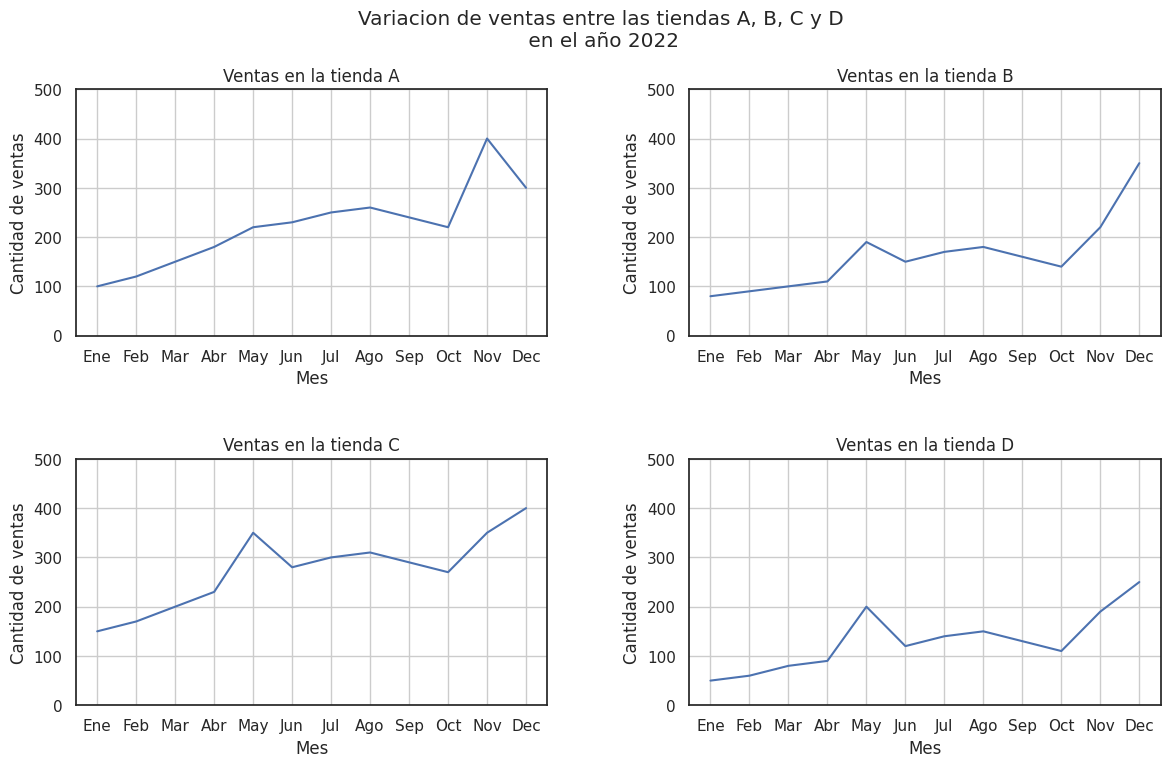

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Espaciado entre las graficas
fig.suptitle('Variacion de ventas entre las tiendas A, B, C y D\n en el año 2022') # Titulo principal

axs[0,0].plot(df_tiendas.loc['A'])
axs[0,0].set_title('Ventas en la tienda A')

axs[0,1].plot(df_tiendas.loc['B'])
axs[0,1].set_title('Ventas en la tienda B')

axs[1,0].plot(df_tiendas.loc['C',:])
axs[1,0].set_title('Ventas en la tienda C')

axs[1,1].plot(df_tiendas.loc['D',:])
axs[1,1].set_title('Ventas en la tienda D')

# Establecer un valor maximo y minimo en el eje "y" para un mejor entendimeinto de los datos entre las 4 graficas
ymin = 0
ymax = 500

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

for ax in axs.flat:
  ax.set_xlabel('Mes')
  ax.set_ylabel('Cantidad de ventas')
  ax.grid()

plt.show()

##### **Desafio 2.1**

---

En esta segunda parte del desafío, debes explorar las opciones de personalización de los subgráficos para hacer que la figura sea más clara y atractiva para la gerencia de la empresa.

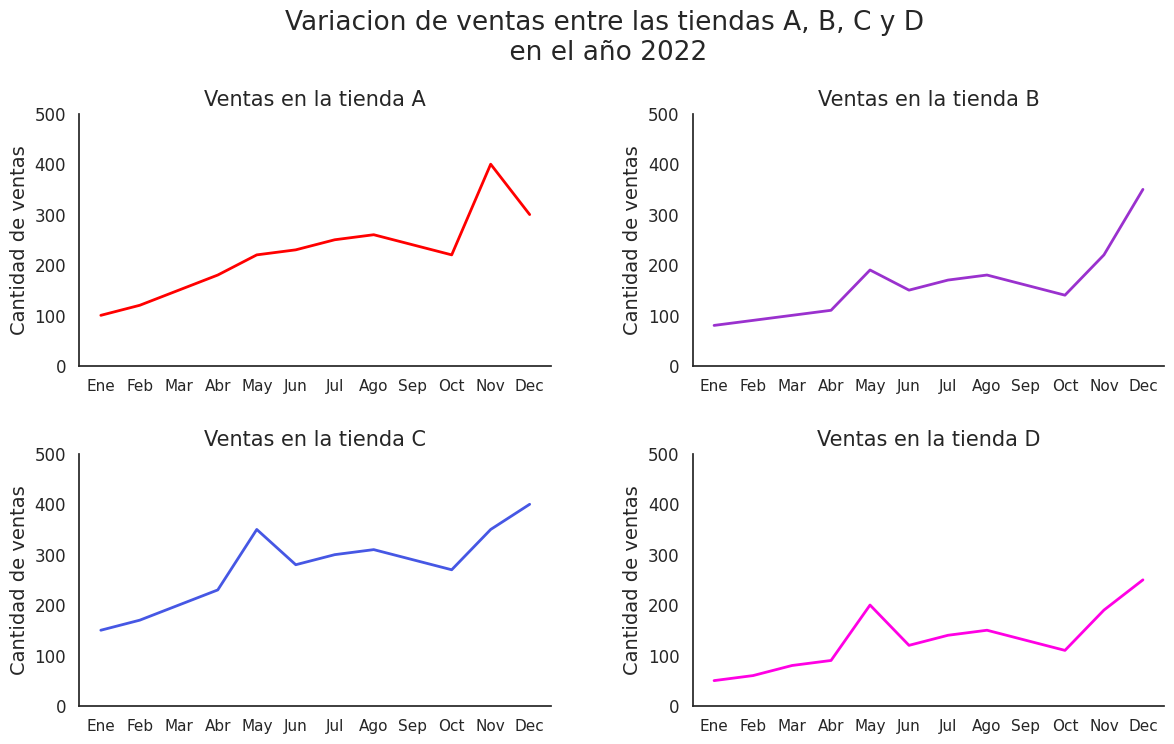

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))
fig.subplots_adjust(hspace=0.35, wspace=0.3, top=0.85) # Espaciado entre las graficas
fig.suptitle('Variacion de ventas entre las tiendas A, B, C y D\n en el año 2022', fontsize=19) # Titulo principal

axs[0,0].plot(df_tiendas.loc['A'], color='#ff0000', linewidth=2)
axs[0,0].set_title('Ventas en la tienda A', fontsize=15)

axs[0,1].plot(df_tiendas.loc['B'], color='#9a31ce', linewidth=2)
axs[0,1].set_title('Ventas en la tienda B', fontsize=15)

axs[1,0].plot(df_tiendas.loc['C',:], color='#4657e4', linewidth=2)
axs[1,0].set_title('Ventas en la tienda C', fontsize=15)

axs[1,1].plot(df_tiendas.loc['D',:], color='#ff00e4', linewidth=2)
axs[1,1].set_title('Ventas en la tienda D', fontsize=15)

# Establecer un valor maximo y minimo en el eje "y" para un mejor entendimeinto de los datos entre las 4 graficas
ymin = 0
ymax = 500

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

for ax in axs.flat:
  ax.set_ylabel('Cantidad de ventas', fontsize=14)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.yaxis.set_tick_params(labelsize=12)

'''
Forma de realizar la personalizacion con menos codigo

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

plt.subplots_adjust(wspace=0.3, hspace=0.4)

fig.suptitle('Variacion de ventas entre las tiendas A, B, C y D\n en el año 2022', fontsize=20)

colores = ['darkviolet', 'green', 'darkblue', 'coral']

# Bucle para trazar y personalizar los subgráficos
for i, ax in enumerate(axs.flat):
    ax.plot(df.loc[df.index[i]], color=colores[i], lw=3)
    ax.set_title(f'Ventas en la tienda {df.index[i]}', loc='left', fontsize=16)
    ax.set_xlabel('Mes', fontsize=14)
    ax.set_ylabel('Número de ventas', fontsize=14)
    ax.tick_params(labelsize=12)
    ax.grid(color='lightgrey')
'''

plt.show()

### **Desafios de Seaborn**

#### **Desafio 1**

---

En esta etapa, tu desafío es crear una figura que muestre las tendencias de inmigración de los 4 mayores países de América Latina: Brasil, Argentina, Perú y Colombia. Esta figura debe tener una línea para cada país, título, etiquetas en los ejes, colores apropiados, un tema de la biblioteca Seaborn y una leyenda.

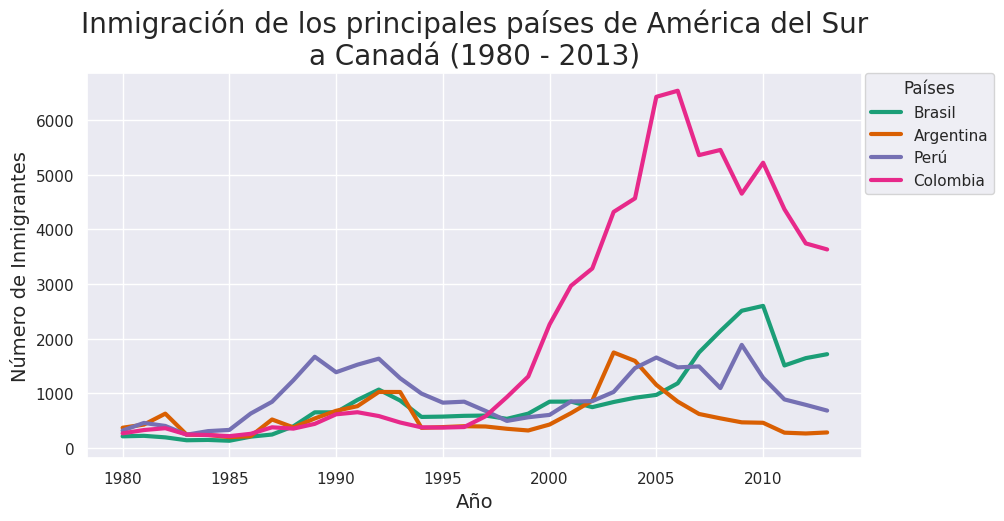

In [56]:
sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(df.loc['Brasil', anos], label='Brasil', lw=3)
ax = sns.lineplot(df.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(df.loc['Perú', anos], label='Perú', lw=3)
ax = sns.lineplot(df.loc['Colombia', anos], label='Colombia', lw=3)

ax.set_title('Inmigración de los principales países de América del Sur\na Canadá (1980 - 2013)', fontsize=20)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.18, 1.02))

plt.show()